Ejercicio de EDA para dataset relacionados al registro detallado de prestamos

In [1]:
''' Se cargan diversos paquete para EDA'''

import numpy as np # algebra lineal
import pandas as pd # procesamiento de datos tabulares, leer CSV
import matplotlib.pyplot as plt # visulaizacion de datos
import seaborn as sns # visualizacion de datos
from scipy import stats # estadistica
from sklearn.cluster import DBSCAN # valores a tipicos
from collections import Counter
from fancyimpute import KNN # imputacion de vecinos mas proximos

import os

''' Datasets a utilizar '''
print(os.listdir(r"../EDA Creditos"))

['EDA creditos.ipynb', 'test_AV3.csv', 'test_data.csv', 'train_AV3.csv', 'train_data.csv', 'train_prediction.csv']


Importar los datasets desde archivos CSV

In [2]:
test_df = pd.read_csv("test_AV3.csv")
train_df = pd.read_csv("train_AV3.csv")

In [3]:
''' Estructura de los datos'''
train_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
test_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [5]:
''' Forma de los datos '''
train_df.shape

(614, 13)

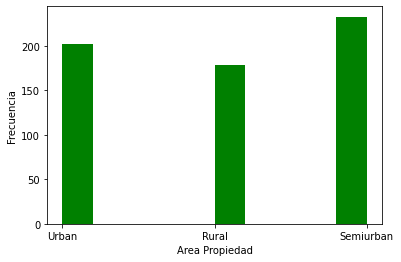

In [6]:
''' Histograma de acuerdo a Property Area '''
plt.hist(train_df["Property_Area"], color="green")
plt.xlabel("Area Propiedad")
plt.ylabel("Frecuencia")
plt.show()

In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [8]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [9]:
train_df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [10]:
test_df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome      int64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
dtype: object

De las descripciones se puede observar lo siguiente:

    .Para ambos dataset existen muchos valores nulos que requieren atencion
    .train_df y test_df tienen 13 y 12 atributos respectivamente
    .Categoricos: Gender, Married, Education, Self_Employed, Property_Area, Loan_Status
    .Numericos: Dependents, Credit_History
    .Continuos: ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term
    .La mayoria de las casas es en areas urbanas
    .Se necesitan cambiar el tipo de datos de algunos atributos

In [11]:
train_df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


Observacion: La media y el promedio de casi todos los atributos estan muy aparte. Cerca del 84% de la poblacion tiene credit History

In [12]:
train_df.mode().iloc[0][1:]

Gender                    Male
Married                    Yes
Dependents                   0
Education             Graduate
Self_Employed               No
ApplicantIncome         2500.0
CoapplicantIncome          0.0
LoanAmount               120.0
Loan_Amount_Term         360.0
Credit_History             1.0
Property_Area        Semiurban
Loan_Status                  Y
Name: 0, dtype: object

Correccion de datos y valores nulos.

In [13]:
''' Cantidad de valores nulos '''
train_df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

count    614.000000
mean     146.412162
std       84.037468
min        9.000000
25%      100.250000
50%      129.000000
75%      164.750000
max      700.000000
Name: LoanAmount, dtype: float64
count    592.000000
mean     146.412162
std       85.587325
min        9.000000
25%      100.000000
50%      128.000000
75%      168.000000
max      700.000000
Name: LoanAmount, dtype: float64


<AxesSubplot:ylabel='Frequency'>

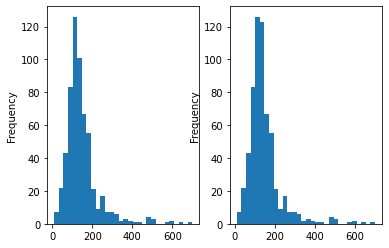

In [14]:
''' Usar la media para completar valores NAN '''

fig,axes = plt.subplots(nrows=1, ncols=2)
mean = train_df.LoanAmount.mean()
train_df.LoanAmount.fillna(mean).plot(kind = "hist", bins = 30, ax = axes[1])
print(train_df.LoanAmount.fillna(mean).describe())
print(train_df.LoanAmount.describe())
train_df.LoanAmount.plot(kind = "hist", bins = 30, ax = axes[0])

count    614.000000
mean     145.752443
std       84.107233
min        9.000000
25%      100.250000
50%      128.000000
75%      164.750000
max      700.000000
Name: LoanAmount, dtype: float64
count    592.000000
mean     146.412162
std       85.587325
min        9.000000
25%      100.000000
50%      128.000000
75%      168.000000
max      700.000000
Name: LoanAmount, dtype: float64


<AxesSubplot:ylabel='Frequency'>

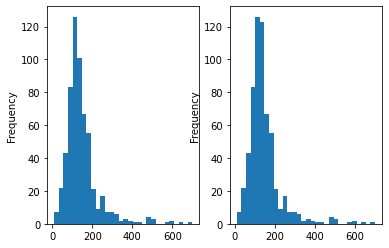

In [21]:
''' Usar la mediana para completar valores NAN '''

fig,axes = plt.subplots(nrows=1, ncols=2)
median = train_df.LoanAmount.median()
train_df.LoanAmount.fillna(median).plot(kind = 'hist', bins = 30, ax = axes[1])
print(train_df.LoanAmount.fillna(median).describe())
print(train_df.LoanAmount.describe())
train_df.LoanAmount.plot(kind = 'hist', bins = 30, ax = axes[0])

Al tener que la mediana < media, se puede inferir que la distribucion esta sesgada, por lo que la media puede considerarse una mejor forma de tratar con el centro.
Se puede observar la asimetria en los histogramas.

In [22]:
''' Usar KNN para completar valores NAN '''

train_df.ApplicantIncome = train_df.ApplicantIncome.astype("float")
train_df_numeric = train_df.select_dtypes("float")
df_ing = KNN(k=5).fit_transform(train_df_numeric)

df_ing = pd.DataFrame(df_ing)
df_ing.shape

Imputing row 1/614 with 1 missing, elapsed time: 0.049
Imputing row 101/614 with 0 missing, elapsed time: 0.050
Imputing row 201/614 with 0 missing, elapsed time: 0.050
Imputing row 301/614 with 0 missing, elapsed time: 0.051
Imputing row 401/614 with 0 missing, elapsed time: 0.051
Imputing row 501/614 with 0 missing, elapsed time: 0.052
Imputing row 601/614 with 1 missing, elapsed time: 0.053


(614, 5)

In [26]:
df_ing.index = train_df_numeric.index
df_ing.columns = train_df_numeric.columns

In [27]:
df_ing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ApplicantIncome    614 non-null    float64
 1   CoapplicantIncome  614 non-null    float64
 2   LoanAmount         614 non-null    float64
 3   Loan_Amount_Term   614 non-null    float64
 4   Credit_History     614 non-null    float64
dtypes: float64(5)
memory usage: 24.1 KB


In [28]:
''' Hacer un copia de train_df para comletar los valores desde df_ing '''

train_df_c = train_df.copy()

In [29]:
train_df_c.LoanAmount = df_ing.LoanAmount

count    592.000000
mean     146.412162
std       85.587325
min        9.000000
25%      100.000000
50%      128.000000
75%      168.000000
max      700.000000
Name: LoanAmount, dtype: float64
count    614.000000
mean     146.288928
std       85.927332
min        9.000000
25%      100.000000
50%      128.000000
75%      166.750000
max      700.000000
Name: LoanAmount, dtype: float64


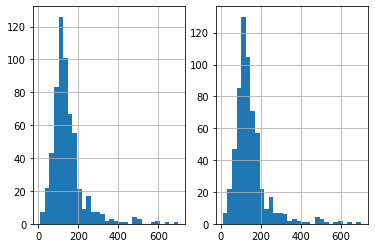

In [30]:
fig, axes = plt.subplots(nrows=1,ncols=2)
train_df.LoanAmount.hist(bins = 30, ax = axes[0])
train_df_c.LoanAmount.hist(bins = 30, ax = axes[1])
print(train_df.LoanAmount.describe())
print(train_df_c.LoanAmount.describe())

* KNN resulta conveniente ya que la diferencia en magnitud de std en .LoanAmount del original y el imputado es de 0.4, y en este caso el promedio es casi igual.
* Como el conjunto de datos es pequeño es posible aplicar KNN a otros valores.